In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mnist = fetch_openml('mnist_784')
mnist.target = mnist.target.astype(np.uint8)

In [3]:
x=mnist['data']
y=mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
scaler=StandardScaler()
scaler.fit(x)
scaled_data=scaler.transform(x)

In [13]:
pca=PCA(n_components=2)

In [18]:
X_pca = pca.fit_transform(scaled_data)
X_pca.shape

(70000, 2)

In [19]:
pca.fit(X_reduce)

PCA(n_components=2)

In [20]:
pca.explained_variance_ratio_

array([0.58268805, 0.41731195])

Text(0, 0.5, 'Second principle component')

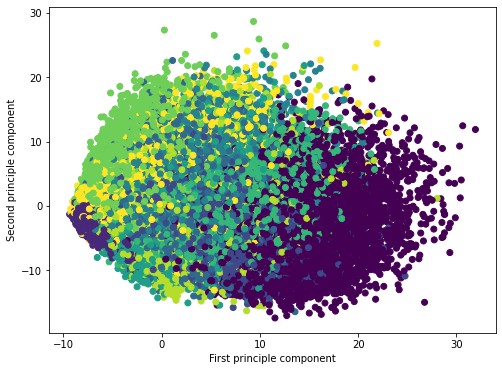

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=mnist['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [23]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(x, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(x)

In [24]:
X_pca=inc_pca.inverse_transform(X_reduced)

In [25]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

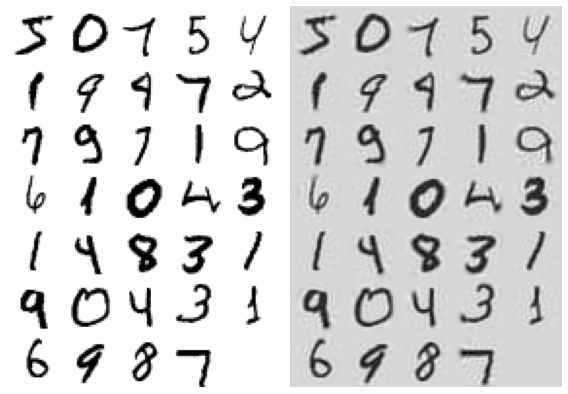

In [27]:
plt.figure(figsize=(8,6))
plt.subplot(121)
plot_digits(x[::2100])
plt.subplot(122)
plot_digits(X_pca[::2100])
plt.tight_layout()

In [23]:
X,t=make_swiss_roll(n_samples=1000, noise=0.2, random_state=28)

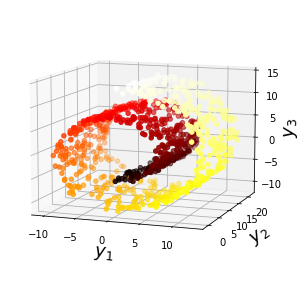

In [24]:
axes = [-11.5, 14, -2, 23, -12, 15]
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$y_1$", fontsize=18)
ax.set_ylabel("$y_2$", fontsize=18)
ax.set_zlabel("$y_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

In [26]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)

In [27]:
X_reduced = rbf_pca.fit_transform(X)

In [28]:
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

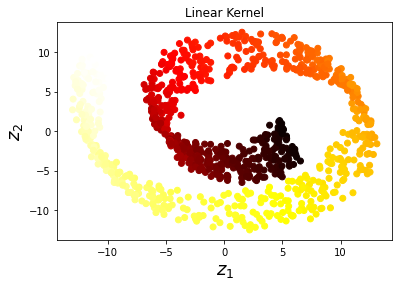

In [29]:
X_reduced=lin_pca.fit_transform(X)
plt.subplot()
plt.title("Linear Kernel")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.show()

Text(0, 0.5, '$z_2$')

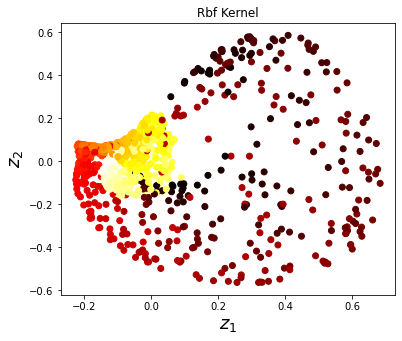

In [30]:
plt.figure(figsize=(6, 5))
X_reduced=rbf_pca.fit_transform(X)
plt.subplot()
plt.title("Rbf Kernel")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)

Text(0, 0.5, '$z_2$')

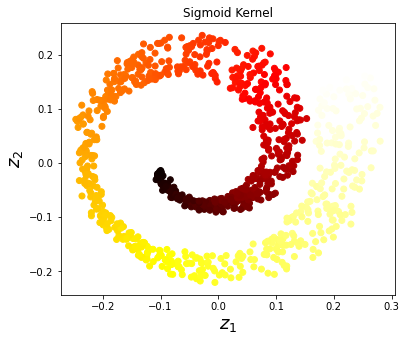

In [31]:
plt.figure(figsize=(6, 5))
X_reduced=sig_pca.fit_transform(X)
plt.subplot()
plt.title("Sigmoid Kernel")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)

In [32]:
from sklearn.model_selection import GridSearchCV
y=t>6.9

In [33]:
clf = Pipeline([("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))])

In [34]:
param_grid = [{"kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]}]

In [35]:
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [36]:
print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}


In [37]:
grid_scores = grid_search.cv_results_

In [38]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.03, fit_inverse_transform=True)
plt.figure(figsize=(6, 5))

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

KernelPCA(fit_inverse_transform=True, gamma=0.03, kernel='rbf', n_components=2)

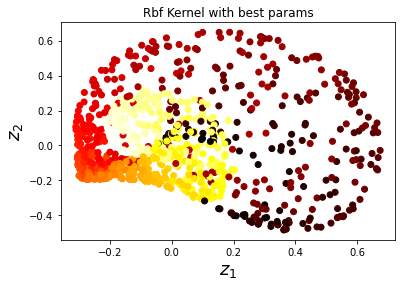

In [39]:
X_reduced=rbf_pca.fit_transform(X)
plt.subplot()
plt.title("Rbf Kernel with best params")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
rbf_pca

In [40]:
results_df = pd.DataFrame(grid_scores)

In [41]:
results_df = results_df.sort_values(by=["rank_test_score"])

In [42]:
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       20 non-null     float64
 1   std_fit_time        20 non-null     float64
 2   mean_score_time     20 non-null     float64
 3   std_score_time      20 non-null     float64
 4   param_kpca__gamma   20 non-null     object 
 5   param_kpca__kernel  20 non-null     object 
 6   params              20 non-null     object 
 7   split0_test_score   20 non-null     float64
 8   split1_test_score   20 non-null     float64
 9   split2_test_score   20 non-null     float64
 10  mean_test_score     20 non-null     float64
 11  std_test_score      20 non-null     float64
 12  rank_test_score     20 non-null     int32  
dtypes: float64(9), int32(1), object(3)
memory usage: 2.1+ KB


In [43]:
model_scores = results_df.filter(regex=r"split\d*_test_score")

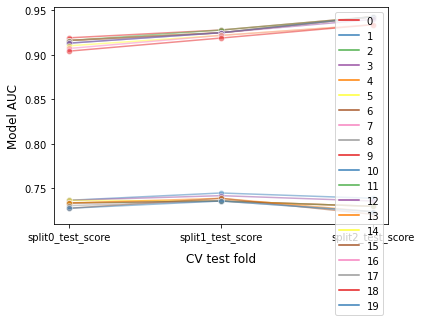

In [44]:
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:5],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=True)
plt.show()

In [45]:
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

Correlation of models:
           0         2         4         6         8         10        12  \
0   1.000000  0.996762  0.998917  0.998917  0.998917  0.999562  0.996780   
2   0.996762  1.000000  0.991943  0.991943  0.991943  0.998706  1.000000   
4   0.998917  0.991943  1.000000  1.000000  1.000000  0.997102  0.991970   
6   0.998917  0.991943  1.000000  1.000000  1.000000  0.997102  0.991970   
8   0.998917  0.991943  1.000000  1.000000  1.000000  0.997102  0.991970   
10  0.999562  0.998706  0.997102  0.997102  0.997102  1.000000  0.998717   
12  0.996780  1.000000  0.991970  0.991970  0.991970  0.998717  1.000000   
14  0.989650  0.997984  0.981902  0.981902  0.981902  0.993465  0.997970   
16  0.978178  0.991717  0.967454  0.967454  0.967454  0.983901  0.991689   
18  0.989510  0.997922  0.981718  0.981718  0.981718  0.993353  0.997908   
1   0.112296  0.191827  0.065946  0.065946  0.065946  0.141667  0.191614   
3  -0.268742 -0.190427 -0.313261 -0.313261 -0.313261 -0.240106 -

In [46]:
X_reduced[850:855]

array([[-0.1785433 ,  0.01976513],
       [-0.30932659,  0.0897468 ],
       [ 0.23671249, -0.39597484],
       [-0.03300456,  0.14901903],
       [ 0.1628267 , -0.11483518]])